<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Quarter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [ ]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 15.4 MB/s 
     |████████████████████████████████| 41 kB 147 kB/s 
     |████████████████████████████████| 98 kB 6.3 MB/s 
     |████████████████████████████████| 4.5 MB 64.5 MB/s 
     |████████████████████████████████| 832 kB 75.1 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.6 MB 58.0 MB/s 


# **Import**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel
import seaborn as sb

matplotlib.rcParams['figure.figsize'] = (15,8)
sb.set_style('darkgrid')

# Code

In [ ]:
df = pd.read_csv('kepler_quarter_9.csv').drop(0)
t = []
for i in df['KEP Mag']:
  t.append(float(i))
df['KEP Mag'] = t

t = []
for i in df['Teff']:
  t.append(float(i))
df['Teff'] = t

In [ ]:
df

,Kepler ID,Investigation ID,Dataset Name,Quarter,RA (J2000),Dec (J2000),Target Type,Archive Class,Ref,Actual Start Time,Actual End Time,Release Date,R Mag,J Mag,KEP Mag,2MASS ID,2MASS conflict flag,Teff,Log G,Metallicity,E(B-V),Radius,Total PM,G-R color,Module,Output,Channel,Skygroup_ID,Condition flag
1,757450,EX,KPLR000757450-2011177032512,9.0,19 24 33.022,+36 34 38.57,LC,CLC,2.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,15.207,13.664,15.264,19243302+3634385,0.0,5101.0,4.480,-0.094,0.127,0.933,0.006,0.791,10.0,4.0,32.0,84.0,Exoplanet
2,891901,EX,KPLR000891901-2011177032512,9.0,19 23 49.243,+36 41 21.23,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,13.240,12.214,13.306,19234924+3641212,0.0,6051.0,4.411,-0.084,0.105,1.085,0.008,0.419,10.0,4.0,32.0,84.0,NaN
3,891916,EX,KPLR000891916-2011177032512,9.0,19 23 49.973,+36 41 11.80,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,14.761,13.516,14.799,19234997+3641118,0.0,5407.0,4.591,-0.580,0.114,0.834,0.010,0.585,10.0,4.0,32.0,84.0,NaN
4,892107,EX,KPLR000892107-2011177032512,9.0,19 24 00.250,+36 38 33.47,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-02-13 00:00:00,12.307,10.740,12.380,19240024+3638334,0.0,5029.0,3.355,-0.085,0.136,4.118,0.013,0.845,10.0,4.0,32.0,84.0,Red_giant
5,892195,EX,KPLR000892195-2011177032512,9.0,19 24 05.206,+36 38 37.39,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,13.685,12.316,13.757,19240520+3638374,0.0,5553.0,3.972,-0.054,0.147,1.865,0.012,0.704,10.0,4.0,32.0,84.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30825,5461988,EX,KPLR005461988-2011177032512,9.0,19 42 11.988,+40 38 56.51,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,15.180,13.762,15.223,19421198+4038564,0.0,5068.0,4.461,-0.376,0.129,0.953,0.006,0.735,15.0,2.0,50.0,78.0,NaN
30826,5462004,EX,KPLR005462004-2011177032512,9.0,19 42 13.346,+40 38 05.42,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,13.556,12.625,13.604,19421334+4038054,0.0,6004.0,4.682,-0.388,0.092,0.775,0.009,0.405,15.0,2.0,50.0,78.0,NaN
30827,5462007,EX,KPLR005462007-2011177032512,9.0,19 42 13.522,+40 36 45.22,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,15.576,14.394,15.630,19421352+4036452,0.0,5416.0,4.971,-0.228,0.109,0.514,0.014,0.608,15.0,2.0,50.0,78.0,NaN
30828,5462040,EX,KPLR005462040-2011177032512,9.0,19 42 15.415,+40 37 41.88,LC,CLC,0.0,2011-03-21 00:24:25,2011-06-26 10:10:29,2012-07-28 12:00:00,13.733,12.749,13.773,19421541+4037418,0.0,6033.0,4.514,-0.454,0.115,0.956,0.005,0.410,15.0,2.0,50.0,78.0,NaN


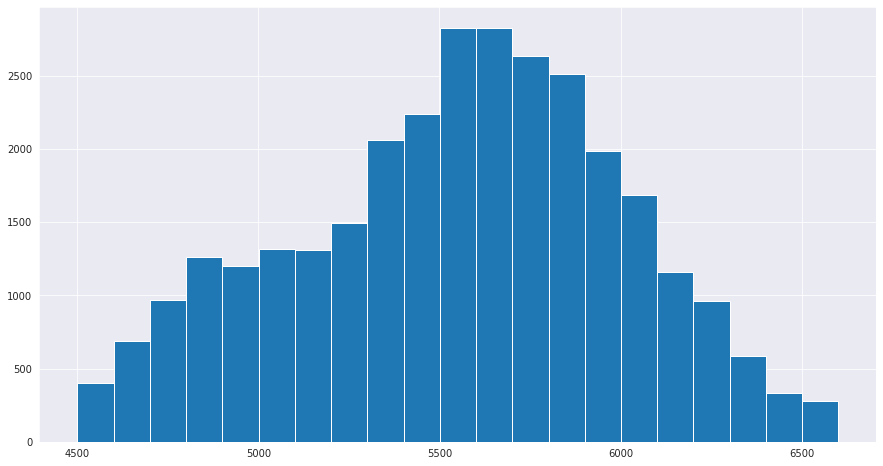

In [ ]:
data = df['Teff']

min = data.min()
max = data.max()
step_size = 100
bins = np.arange(min,max, step_size)

plt.hist(data,bins);

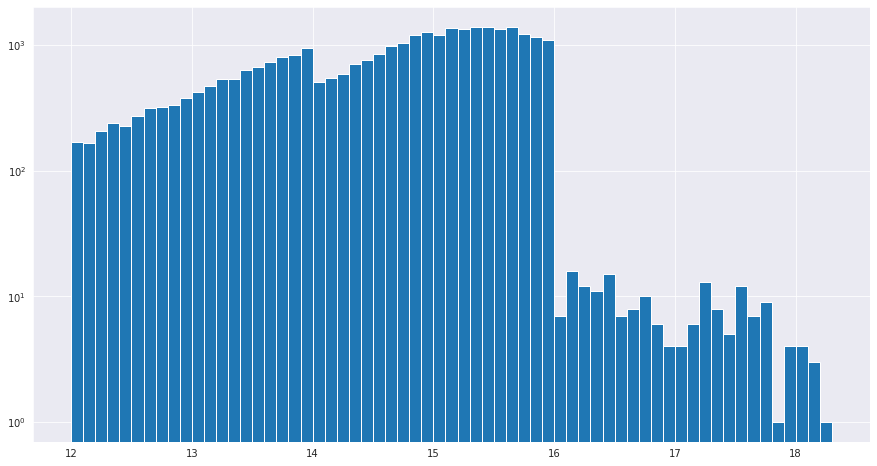

In [ ]:
data = df['KEP Mag']

min = data.min()
max = data.max()
step_size = 0.1
bins = np.arange(min,max, step_size)
plt.hist(data,bins)
plt.yscale('log');

In [ ]:
df_test = df[:500]

In [ ]:
flr_list = []
logg_list = []
for id in df_test['Dataset Name']:
  name    = id[:13]
  source  = lk.search_lightcurve(name, author="Kepler", cadence="long",quarter = 9).download()
  rem_out = source.remove_outliers(sigma_upper = 2.5).normalize()

  pg      = rem_out.to_periodogram(normalization='psd')
  seismo  = pg.flatten().to_seismology() 
  seismo.estimate_numax() 
  logg = seismo.estimate_logg()

  logg_list.append(logg.value)   
              
  flux    = rem_out.flux.value
  time    = rem_out.time.value
  smoothed_signal = convolve(flux, Box1DKernel(16))
  flkr    = flux[index:-ind]-smoothed_signal[index:-ind]
  flr     = np.sqrt(np.mean(flkr**2))*1e3

  flr_list.append(flr)

In [ ]:
df_test['flicker'] = flr_list
df_test['logg_lc'] = logg_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.0, 2.0)

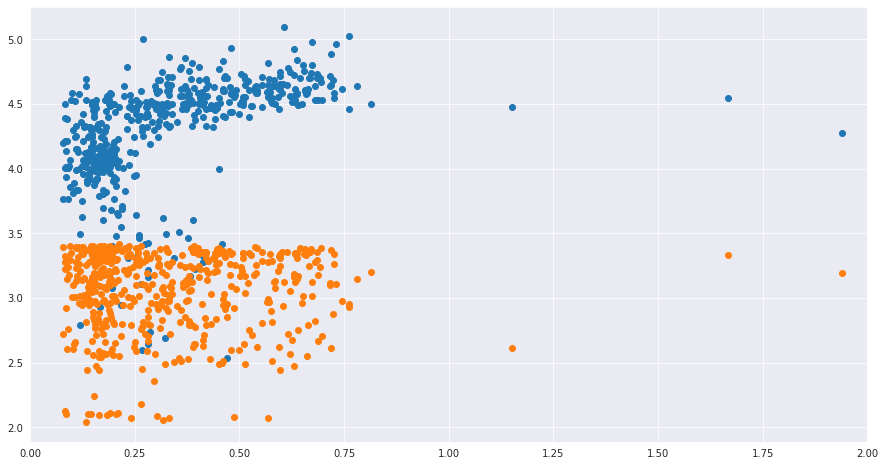

In [ ]:
x = df_test['flicker']
y = df_test['Log G']


plt.scatter(x,y)
plt.xlim(0,2)

x = df_test['flicker']
y = df_test['logg_lc']

plt.scatter(x,y)
plt.xlim(0,2)

(0.0, 2.0)

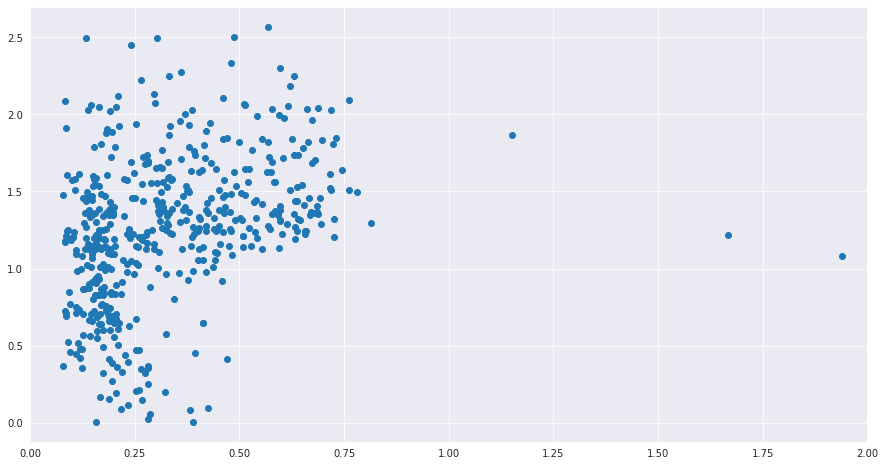

In [ ]:
x = df_test['flicker']
y = abs(df_test['Log G'] - df_test['logg_lc'])


plt.scatter(x,y)
plt.xlim(0,2);